In [1]:
import pandas as pd
import matplotlib as plt

E:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
E:\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
plt.rcParams['savefig.dpi'] = 900
plt.rcParams['figure.dpi'] = 900

In [3]:
data = pd.read_csv('Ecommerce data.csv')
data.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


## General Statistics of Variable _r, f, m_

In [4]:
data[["r", "f", "m"]].describe()

,r,f,m
count,33713.000000,33713.000000,33713.000000
mean,508.427254,5.820603,251.924325
std,542.440039,7.008049,3929.929826
min,0.000000,0.000000,0.000000
25%,117.000000,1.000000,39.899994
50%,293.000000,3.000000,102.629944
75%,712.000000,7.000000,247.297485
max,2460.000000,118.000000,532892.000000


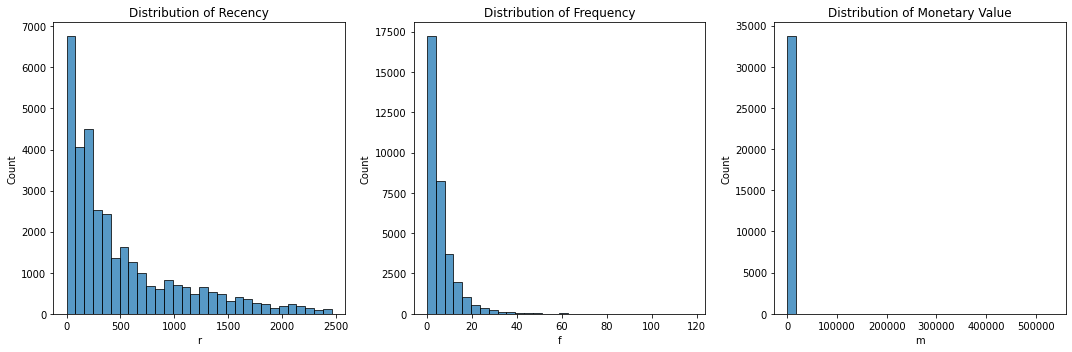

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Recency Histogram
plt.subplot(1, 3, 1)
sns.histplot(data['r'], bins=30, kde=False)
plt.title('Distribution of Recency')

# Frequency Histogram
plt.subplot(1, 3, 2)
sns.histplot(data['f'], bins=30, kde=False)
plt.title('Distribution of Frequency')

# Monetary Histogram
plt.subplot(1, 3, 3)
sns.histplot(data['m'], bins=30, kde=False)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()

Conclusion:

- **Recency & Frequency**: Right-skewed
- **Monetary Value**: Extremely right-skewed. Most customers have a relatively low total monetary value, and very few have a high monetary value.The long tail extending to the right indicates the presence of outliers with exceptionally high spend on the website. These are likely some VIP customers who contribute a significant portion of the revenue.

## RFM Analysis

1. Recency and Frequency: Segment these using quartiles (0.25, 0.5, 0.75), with scores from 1 to 4. More recent and more frequent purchases get higher scores.

2. Monetary: Also use quartiles for segmentation, but additionally identify the extreme outliers. These customers will be handled separately as they represent a highly valuable segment. Scores from 1 to 5, where 5 stands for outliers.

3. Outlier Handling: Define a threshold for outliers in the "m" dimension. Here consider a fixed monetary value 100,000, depending on the  business context.

4. Assigning Scores: After segmenting based on quartiles, assign a special score to indicate customer segments.

In [6]:
# Ensure numeric data types and handle missing values
data['r'] = pd.to_numeric(data['r'], errors='coerce')
data['f'] = pd.to_numeric(data['f'], errors='coerce')
data['m'] = pd.to_numeric(data['m'], errors='coerce')
data = data.dropna(subset=['r', 'f', 'm'])

In [7]:
# Define quartiles for R and F
r_labels = range(4, 0, -1)  # Since recent customers are more valuable, they get a higher score
f_labels = range(1, 5)
r_quartiles = pd.qcut(data['r'], q=4, labels=r_labels)
f_quartiles = pd.qcut(data['f'], q=4, labels=f_labels)

# Assign quartile labels to the data
data['R_Score'] = r_quartiles
data['F_Score'] = f_quartiles

# For 'm', first define a new category '5' for high spenders
data['M_Score'] = pd.qcut(data['m'], q=4, labels=False) + 1  # This will assign labels from 1 to 4
high_spender_threshold = 100000
data.loc[data['m'] > high_spender_threshold, 'M_Score'] = 5  # Assign '5' to high spenders

# Combine the RFM scores into a single score
data['RFM_Score'] = data['R_Score'].astype(str) + data['F_Score'].astype(str) + data['M_Score'].astype(str)

# Output the first few rows to confirm the RFM scoring
data[['r', 'f', 'm', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']]

,r,f,m,R_Score,F_Score,M_Score,RFM_Score
0,194,7,318.894775,3,3,4,334
1,3,14,368.052246,4,4,4,444
2,1489,15,423.298340,1,4,4,144
3,155,4,71.217041,3,3,2,332
4,194,6,442.638184,3,3,4,334
...,...,...,...,...,...,...,...
33708,6,1,0.000000,4,1,1,411
33709,4,1,0.000000,4,1,1,411
33710,5,1,22.949997,4,1,1,411
33711,0,0,0.000000,4,1,1,411


**Segmentation Rule:**

(I think I've guaranteed MECE. Apart from "5" in m_score, the other $ 4\times4\times4 = 64 $ scores will be allocated into only one category and no left out) (Also this is not a good way of showing MECE. I'll beautify this)

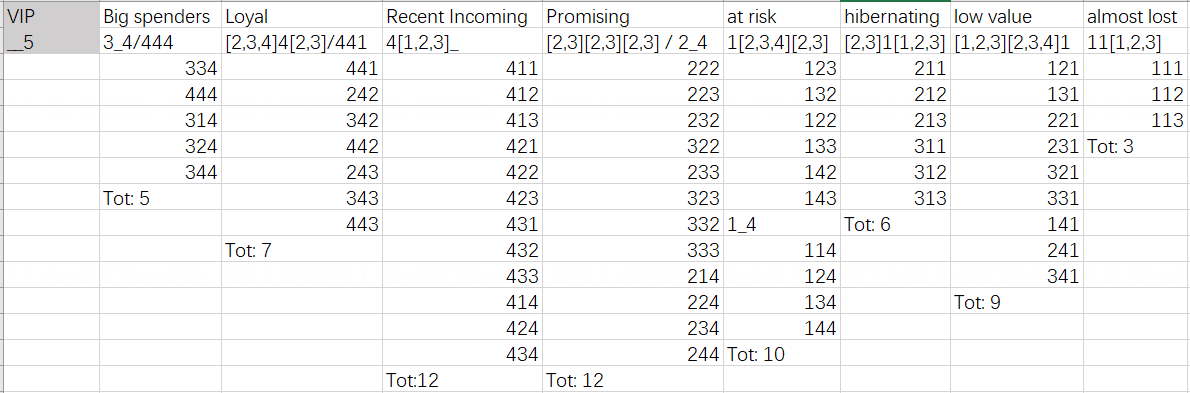

In [10]:
def assign_rfm_segments(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    r, f, m = int(r), int(f), int(m)
    
    if m == 5:
        return 'VIP Customers'
    elif (m == 4 and r == 3) or (r == 4 and f == 4 and m ==4):
        return 'Big Spenders'
    elif (r in [2, 3, 4] and f == 4 and m in [2, 3]) or (r == 4 and f == 4 and m == 1):
        return 'Loyal Customers'
    elif r == 4 and f in [1, 2, 3]:
        return 'Recent Incoming Customers'
    elif (r in [2, 3] and f in [2, 3] and m in [2, 3]) or (r == 2 and m == 4):
        return 'Promising Customers'
    elif (r == 1 and f in [2, 3, 4] and m in [2, 3]) or (r == 1 and m == 4):
        return 'At Risk'
    elif r in [2, 3] and f == 1 and m in [1, 2, 3]:
        return 'Hibernating'
    elif r in [1, 2, 3] and f in [2, 3, 4] and m == 1:
        return 'Low Value Customers'
    elif r == 1 and f == 1 and m in [1, 2, 3]:
        return 'Almost Lost'
    else:
        return 'Other'

# Apply the function to the dataframe
data['Segment'] = data.apply(assign_rfm_segments, axis=1)

# Check the first few rows to see the segments
data[['R_Score', 'F_Score', 'M_Score', 'Segment']]

,R_Score,F_Score,M_Score,Segment
0,3,3,4,Big Spenders
1,4,4,4,Big Spenders
2,1,4,4,At Risk
3,3,3,2,Promising Customers
4,3,3,4,Big Spenders
...,...,...,...,...
33708,4,1,1,Recent Incoming Customers
33709,4,1,1,Recent Incoming Customers
33710,4,1,1,Recent Incoming Customers
33711,4,1,1,Recent Incoming Customers


In [11]:
data['Segment'].value_counts()

Segment
Promising Customers          7877
At Risk                      5278
Recent Incoming Customers    5061
Big Spenders                 4850
Hibernating                  4673
Almost Lost                  2564
Loyal Customers              1719
Low Value Customers          1687
VIP Customers                   4
Name: count, dtype: int64

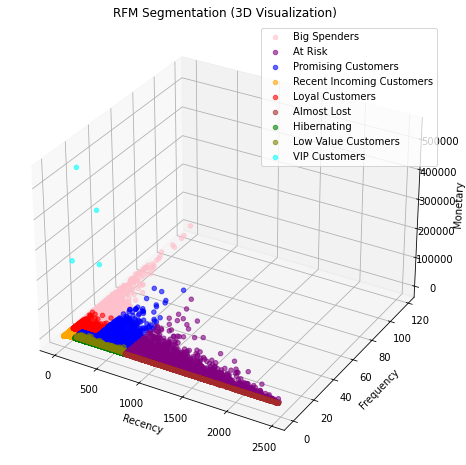

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with the RFM scores and segments

# Define colors for each segment for visual distinction
color_dict = {
    'Big Spenders': 'pink',
    'Promising Customers': 'blue',
    'Hibernating': 'green',
    'Recent Incoming Customers': 'orange',
    'At Risk': 'purple',
    'Almost Lost': 'brown',
    'Loyal Customers': 'red',
    'Low Value Customers': 'olive',
    'VIP Customers': 'cyan'
}

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each segment with a different color
for segment in data['Segment'].unique():
    segment_data = data[data['Segment'] == segment]  # Use a temporary variable for the filtered data
    ax.scatter(segment_data['r'], segment_data['f'], segment_data['m'], 
               label=segment, s=20, alpha=0.6, color=color_dict[segment])

# Label the axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Legend and title
plt.legend()
plt.title('RFM Segmentation (3D Visualization)')

# Show plot
plt.show()

**Question**: Is this a good way of showing segments? Or treemap is better?

**Synthesize New Customers**

In [12]:
import numpy as np

np.random.seed(42)

# Generate random data following an exponential distribution (because of the shape of distribution)
new_customers = pd.DataFrame({
    'CustomerID': range(1, 11),
    'r': np.random.exponential(scale=508, size=10).astype(int),
    'f': np.random.exponential(scale=4.82, size=10).astype(int) + 1,  # Frequency must be at least 1
    'm': np.random.exponential(scale=251, size=10)
})

new_customers['m'] = np.maximum(new_customers['m'], 10)

new_customers

,CustomerID,r,f,m
0,1,238,1,237.539089
1,2,1529,17,37.708867
2,3,668,9,86.724394
3,4,463,2,114.525582
4,5,86,1,152.842607
5,6,86,1,386.021939
6,7,30,2,55.906701
7,8,1021,4,181.229318
8,9,466,3,225.273685
9,10,625,2,11.938526


In [14]:
def assign_rfm_segments(row, r_quartiles, f_quartiles, m_quartiles):

    r_score = sum(row['r'] <= bound for bound in r_quartiles) + 1
    f_score = sum(row['f'] >= bound for bound in f_quartiles) + 1
    m_score = sum(row['m'] >= bound for bound in m_quartiles) + 1

    r, f, m = r_score, f_score, m_score
    print(r,f,m)
    
    if m == 5:
        return 'VIP Customers'
    elif m == 4 and r in [2, 3, 4]:
        return 'Big Spenders'
    elif f == 4 and m in [1, 2, 3]:
        return 'Loyal Customers'
    elif r == 4 and f in [1, 2, 3] and m in [1, 2, 3]:
        return 'Recent Incoming Customers'
    elif r in [2, 3] and f in [2, 3] and m in [2, 3]:
        return 'Promising Customers'
    elif (r == 1 and f in [2, 3] and m in [2, 3]) or (r == 1 and m == 4):
        return 'At Risk'
    elif r in [2, 3] and f == 1 and m in [1, 2, 3]:
        return 'Hibernating'
    elif r in [1, 2, 3] and f in [2, 3] and m == 1:
        return 'Low Value Customers'
    elif r == 1 and f == 1 and m in [1, 2, 3]:
        return 'Almost Lost'
    else:
        return 'Other'

r_quartiles = [117, 293, 712]  # Thresholds using quantiles
f_quartiles = [1, 3, 7]
m_quartiles = [39.9, 102.63, 247.3, 100000]

new_customers['Segment'] = new_customers.apply(
    assign_rfm_segments, axis=1, r_quartiles=r_quartiles, f_quartiles=f_quartiles, m_quartiles=m_quartiles)

new_customers[['CustomerID', 'r', 'f', 'm', 'Segment']]

3 2 3
1 4 1
2 4 2
2 2 3
4 2 3
4 2 4
4 2 2
1 3 3
2 3 3
2 2 1


,CustomerID,r,f,m,Segment
0,1,238,1,237.539089,Promising Customers
1,2,1529,17,37.708867,Loyal Customers
2,3,668,9,86.724394,Loyal Customers
3,4,463,2,114.525582,Promising Customers
4,5,86,1,152.842607,Recent Incoming Customers
5,6,86,1,386.021939,Big Spenders
6,7,30,2,55.906701,Recent Incoming Customers
7,8,1021,4,181.229318,At Risk
8,9,466,3,225.273685,Promising Customers
9,10,625,2,11.938526,Low Value Customers
